In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

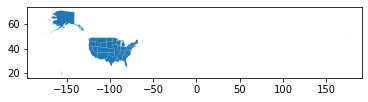

In [2]:
# LOAD SHAPEFILE
fp = 'data/us-states.json'
map_df = gpd.read_file(fp)

fig = map_df.plot()

In [3]:
# LOAD DATA
df = pd.read_csv('hashtags_by_state_lower.csv')
df.head()

,state,hashtags,list,top,count
0,AK,"[['UnAmericanTrump', 'GotTaxes'], ['UnAmerican...","['unamericantrump', 'gottaxes', 'unamericantru...",trump,93
1,AL,"[['talkradio'], ['duhDon', 'rushlame'], ['thre...","['talkradio', 'duhdon', 'rushlame', 'threesome...",trump,180
2,AR,"[['NeverTrump'], ['BillClinton'], ['NeverTrump...","['nevertrump', 'billclinton', 'nevertrump', 'n...",hillary,82
3,AZ,"[['fascist', 'racism'], ['killary4prison'], ['...","['fascist', 'racism', 'killary4prison', 'trump...",trump,1123
4,CA,"[['NeverTrump'], ['NeverTrump', 'BetterWay', '...","['nevertrump', 'nevertrump', 'betterway', 'imw...",trump,4608


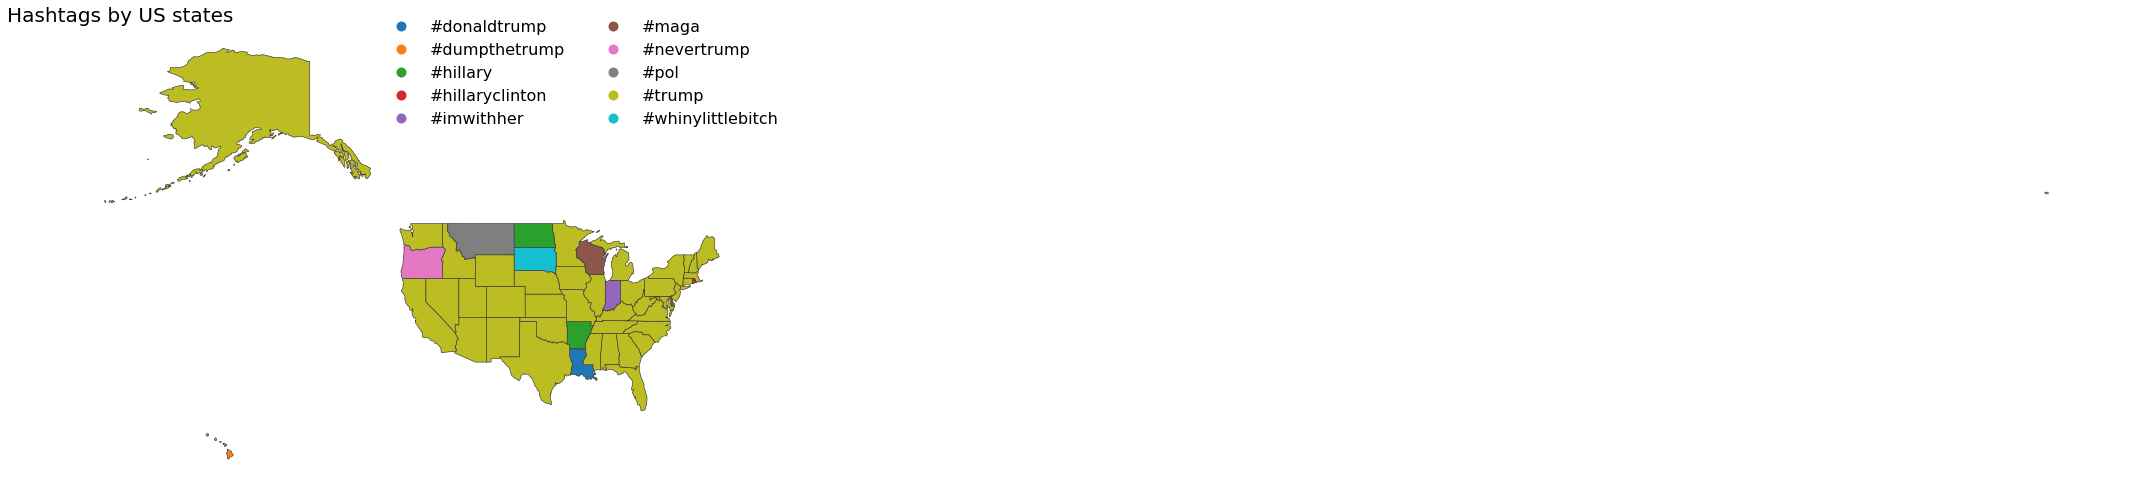

In [4]:
import pandas as pd
import geopandas as gpd
import json
import matplotlib as mpl
import pylab as plt


gdf = gpd.read_file('data/us-states.json')
gdf = gdf.dropna()
gdf = gdf.merge(df, left_on="id", right_on="state")
gdf["top"] = gdf.top.apply(lambda x: "#"+x)

fig, ax = plt.subplots(1, figsize=(30,20))
gdf.plot(column='top', categorical=True, linewidth=.6, edgecolor='0.2',
         legend=True, legend_kwds={'bbox_to_anchor':(.17, 1.05),'fontsize':16,'ncol':2, 'frameon':False, 'loc':'upper left'}, ax=ax)
ax.axis('off')
ax.set_title('Hashtags by US states',fontsize=20, loc="left")
plt.tight_layout()
plt.savefig('images/hashtags_lower.png',dpi=300,bbox_inches = 'tight',
    pad_inches = 0)